### 반복문을 이용해서 여러가지 subplot을 만들어주세요!!
- 데이터는 타이타닉 데이터로 시각화 하기
- 타이타닉 데이터의 경우는 분석할 수 있는 변수 간의 관계가 정말 많아요!
- survived: 이 변수에 따라서 달라지는 변수값을 시각화하는 것이 중요하다!
- 최대한 모든 변수를 시각화 해주시고, 시각화 한 내용에 대해서 주석처리 및 마크다운으로 인사이트 정리
- 반복문을 이용해서 시각화를 진행해 주세요!
- 과제 기한: 11.6
- 수업 시작: 11.6 (10월 한 달은 수업이 없음)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import matplotlib.gridspec as gridspec

In [3]:
# 한글 사용 코드
from matplotlib import font_manager, rc, rcParams

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)
    
rcParams['axes.unicode_minus']=False

In [4]:
titanic = sns.load_dataset("titanic")

In [5]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


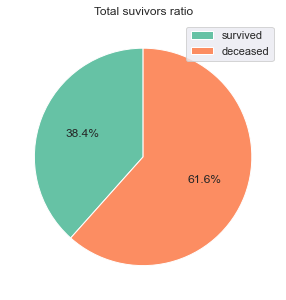

In [6]:
# 전체 생존자 비율
s1 = round(sum(titanic.survived)/len(titanic.survived),3)
s2 = 1 - s1
ratio = [s1, s2]

sns.set()
sns.set_palette("Set2")
plt.figure(figsize=(5,5))
plt.pie(ratio, startangle=90, autopct="%.1f%%")
plt.title("Total suvivors ratio")
plt.legend(["survived","deceased"],loc="upper right")

C:\Users\doram\AppData\Local\Temp\ipykernel_11408\2612035676.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_class = t1.groupby("class")["survived","deceased"].sum()


Text(0.5, 1.0, 'Passenger class survivors')

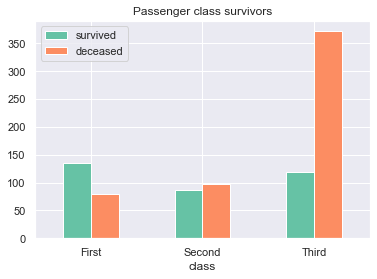

In [7]:
des = abs(titanic.survived - 1)
t1 = titanic.assign(deceased=des)

sum_class = t1.groupby("class")["survived","deceased"].sum()
sum_class.plot.bar(rot=0)
plt.title("Passenger class survivors")

- 생존율: First > Second > Third
- Third class 승객이 사망자의 많은 비율을 차지한다.

C:\Users\doram\AppData\Local\Temp\ipykernel_11408\354063706.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_town = t1.groupby(["embark_town"])["survived","deceased"].sum()


Text(0.5, 1.0, 'Town survivors')

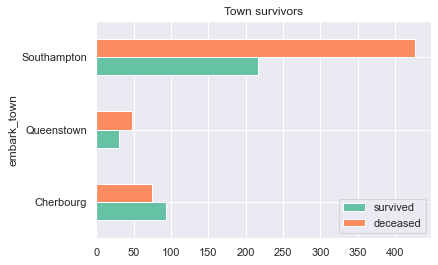

In [8]:
sum_town = t1.groupby(["embark_town"])["survived","deceased"].sum()
sum_town.plot.barh(rot=0)
plt.title("Town survivors")

- 대부분의 승객은 Souththampton에서 승선하였다.
- Cherbourg에서만 생존자의 수가 사망자보다 높다.
- Souththampton 승객이 사망자의 많은 비율을 차지한다.

C:\Users\doram\AppData\Local\Temp\ipykernel_11408\3332531570.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_who = t1.groupby(["who"])["survived","deceased"].sum()


Text(0.5, 1.0, 'Survivors info')

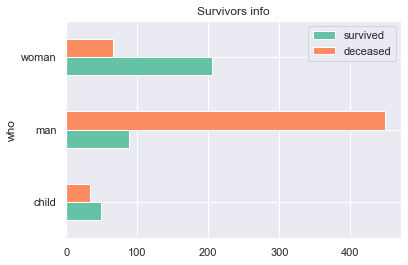

In [9]:
sum_who = t1.groupby(["who"])["survived","deceased"].sum()
sum_who.plot.barh(rot=0)
plt.title("Survivors info")

- 생존율: Woman > Child > Man
- 생존자 수: Woman > Man > Child
- 남자 사망자가 여자, 어린이 사망자에 비해 압도적으로 많다.

C:\Users\doram\AppData\Local\Temp\ipykernel_11408\3048471641.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_sex = t1.groupby(["sex"])["survived","deceased"].sum()


Text(0.5, 1.0, 'Survivors info')

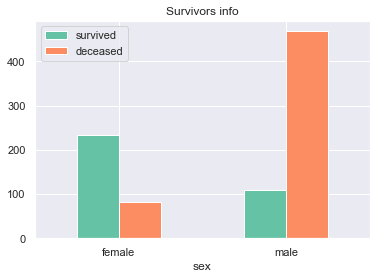

In [10]:
sum_sex = t1.groupby(["sex"])["survived","deceased"].sum()
sum_sex.plot.bar(rot=0)
plt.title("Survivors info")

- 생존율: Woman > Man
- 남자 승객이 사망자의 대부분을 차지한다.

C:\Users\doram\AppData\Local\Temp\ipykernel_11408\2679844992.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_admale = t1.groupby(["adult_male"])["survived","deceased"].sum()


Text(0.5, 1.0, 'Adult male survivors')

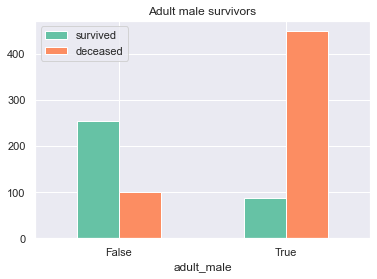

In [11]:
sum_admale = t1.groupby(["adult_male"])["survived","deceased"].sum()
sum_admale.plot.bar(rot=0)
plt.title("Adult male survivors")

- Adult male이 (Woman, Child, Man), (Female, Male)와 비교했을 때 생존율이 가장 낮다.

C:\Users\doram\AppData\Local\Temp\ipykernel_11408\1978958583.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_sib = t1.groupby(["sibsp"])["survived","deceased"].sum()


Text(0.5, 1.0, 'Sibling info of survivors')

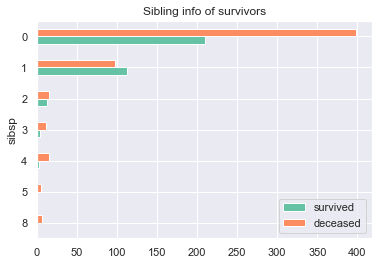

In [12]:
sum_sib = t1.groupby(["sibsp"])["survived","deceased"].sum()
sum_sib = sum_sib.sort_index(ascending=False)
sum_sib.plot.barh(rot=0)
plt.title("Sibling info of survivors")

- 승객의 대부분은 형제/남매와 같이 타이타닉 호를 타지 않았다.
- 같이 승선한 형제/남매가 1명인 경우 생존자가 사망자보다 많다.
- 같이 승선한 형제/남매가 3명 이상일 경우 사망률이 아주 높아진다.

C:\Users\doram\AppData\Local\Temp\ipykernel_11408\1999265227.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_par = t1.groupby(["parch"])["survived","deceased"].sum()


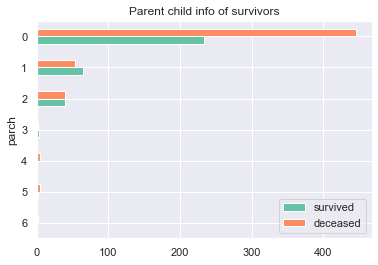

In [13]:
sum_par = t1.groupby(["parch"])["survived","deceased"].sum()
sum_par = sum_par.sort_index(ascending=False)
sum_par.plot.barh(rot=0)
plt.title("Parent child info of survivors")
plt.legend(loc="lower right")

- 승객의 대부분은 부모/자식과 함께 타이타닉 호를 타지 않았다.
- 같이 승선한 부모/자식이 1명일 때 생존율이 가장 높고, 이어서 2명일 때 생존율이 두 번째로 높다.

C:\Users\doram\AppData\Local\Temp\ipykernel_11408\1620514382.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_deck = t1.groupby(["deck"])["survived","deceased"].sum()


Text(0.5, 1.0, 'Deck info of survivors')

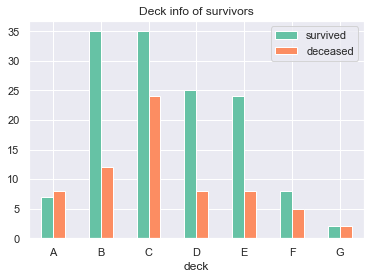

In [14]:
sum_deck = t1.groupby(["deck"])["survived","deceased"].sum()
sum_deck.plot.bar(rot=0)
plt.title("Deck info of survivors")

- deck이 B,D,E일 경우 생존자 수가 사망자 수보다 유의미하게 많다.
- deck이 C,F일 경우 여전히 생존자 수가 사망자보다 많지만 사망자의 비율이 큰 편이다.
- deck이 A일 때 사망자 수가 생존자보다 많으며, G의 경우 생존자와 사망자 수가 같다.

C:\Users\doram\AppData\Local\Temp\ipykernel_11408\1802503092.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_alone = t1.groupby(["alone"])["survived","deceased"].sum()


Text(0.5, 1.0, 'Alone survivors')

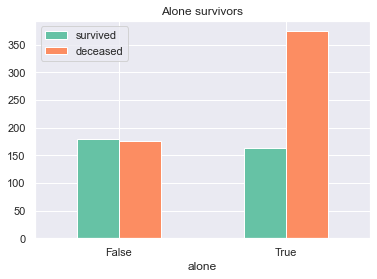

In [15]:
sum_alone = t1.groupby(["alone"])["survived","deceased"].sum()
sum_alone.plot.bar(rot=0)
plt.title("Alone survivors")

- 혼자 타이타닉 호에 탄 승객들의 사망자 수가 생존자보다 많다.
- 다른 사람과 같이 타이타닉 호에 탄 승객의 경우 생존율이 약 50%이다.
- 타이타닉 호에 혼자 승선한 사람이 그렇지 않은 사람보다 사망할 가능성이 높다.

Text(0.5, 1.0, 'Age distribution')

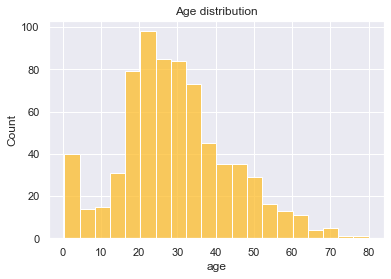

In [16]:
sns.set_palette("plasma_r")
sns.histplot(data=t1, x="age")
plt.title("Age distribution")

- 어린이(0~5세) 승객을 제외하면 나이 분포는 근사적으로 정규분포를 따른다.

Text(0.5, 1.0, 'Fare distribution')

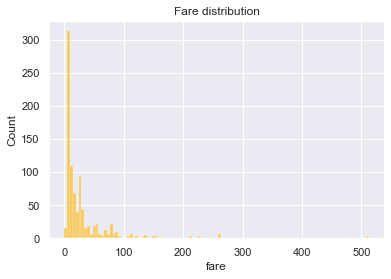

In [17]:
sns.histplot(data=t1, x="fare")
plt.title("Fare distribution")

- 많은 경우 승객의 요금은 0~100 사이에 위치하지만, 500까지 지불한 승객이 있다.
- 20 이하의 요금을 지불한 승객이 대부분을 차지한다.

(0.0, 100.0)

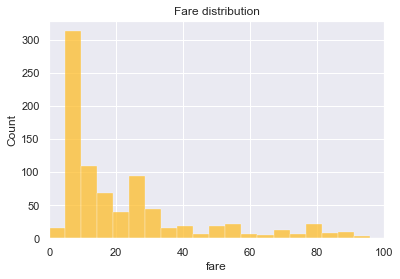

In [18]:
# 0~100 구간만 보여주는 히스토그램
sns.histplot(data=t1, x="fare")
plt.title("Fare distribution")
plt.xlim([0,100])

Text(0.5, 1.0, 'Age of passengers alive')

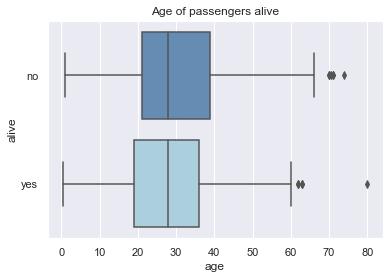

In [19]:
sns.set_palette("RdYlBu_r")
sns.boxplot(data=t1, x="age", y="alive")
plt.title("Age of passengers alive")

- 생존자와 사망자 나이의 중앙값이 거의 같다.
- 그러나 생존자와 사망자의 나이 분포를 보면, 생존자의 분포가 조금 더 왼쪽에 치우쳐져있다.
- 생존자가 사망자에 비해 상대적으로 더 어리다.

Text(0.5, 1.0, 'Age of passengers by class')

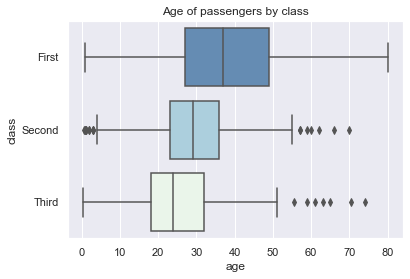

In [20]:
sns.boxplot(data=t1, x="age", y="class")
plt.title("Age of passengers by class")

- 중앙값: First > Second > Third
- class가 낮을수록 전체적인 승객의 나이가 적은 것으로 보인다.

Text(0.5, 1.0, 'Port of embarkation by class')

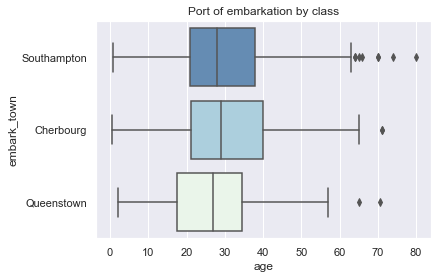

In [21]:
sns.boxplot(data=t1, x="age", y="embark_town")
plt.title("Port of embarkation by class")

- 중앙값: Cherbourg > Southampton > Queenstown
- Queenstown에서 승선한 사람들의 나이가 상대적으로 어리다.

Text(0.5, 1.0, 'Fare of passengers alive (1)')

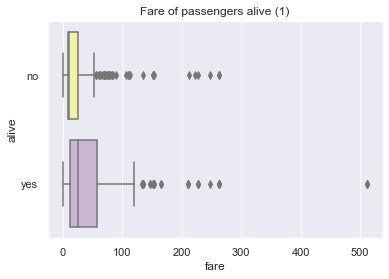

In [22]:
sns.set_palette("Paired_r")
sns.boxplot(data=t1, x="fare", y="alive")
plt.title("Fare of passengers alive (1)")

(0.0, 160.0)

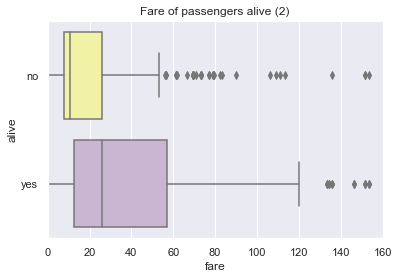

In [23]:
sns.boxplot(data=t1, x="fare", y="alive")
plt.title("Fare of passengers alive (2)")
plt.xlim([0,160])

- 중앙값: Yes > No
- 생존자가 지불한 요금이 사망자보다 더 높은 것으로 보인다.

(0.0, 160.0)

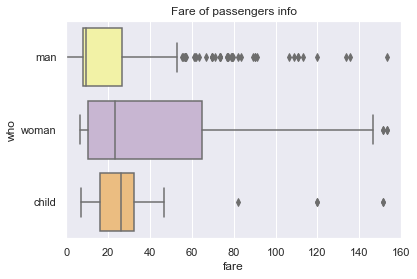

In [24]:
sns.boxplot(data=t1, x="fare", y="who")
plt.title("Fare of passengers info")
plt.xlim([0,160])

- 중앙값: Child > Woman > Man
- 어린이 승객의 중앙값이 가장 크지만, 그 범위는 여자와 남자 승객에 비해 좁다.
- 남자 승객의 outlier를 보면 경우 지불한 요금에 따라 두 그룹으로 나눌 수 있는 것으로 보인다.

Text(0.5, 1.0, 'Scatter plot of age and fare')

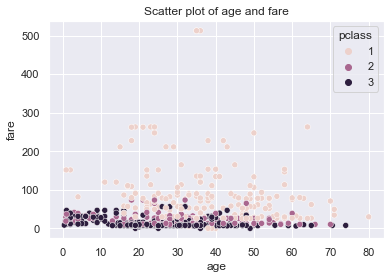

In [25]:
sns.set_palette("rainbow_r")
sns.scatterplot(data=t1, x="age", y="fare", hue="pclass")
plt.title("Scatter plot of age and fare")

- First class 승객의 요금이 다른 class에 비해 높다.
- Second와 Third class 승객의 요금은 First class에 비해 큰 차이가 없다.

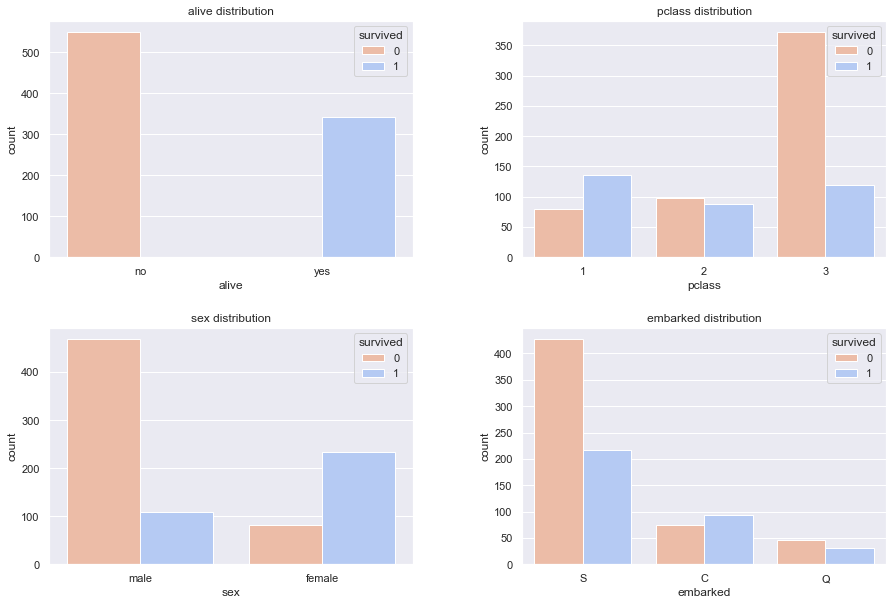

In [45]:
# 반복문 이용하기
grid = gridspec.GridSpec(2,2)
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

t1_features = ["alive", "pclass", "sex", "embarked"]

# 앞에서 보았던 막대그래프를 한번에 볼 수 있다.
for i, feature in enumerate(t1_features):
    ax = plt.subplot(grid[i])
    sns.countplot(x=feature,
                 data=t1,
                 hue='survived',
                 palette='coolwarm_r',
                 ax=ax)
    ax.set_title(f'{feature} distribution')

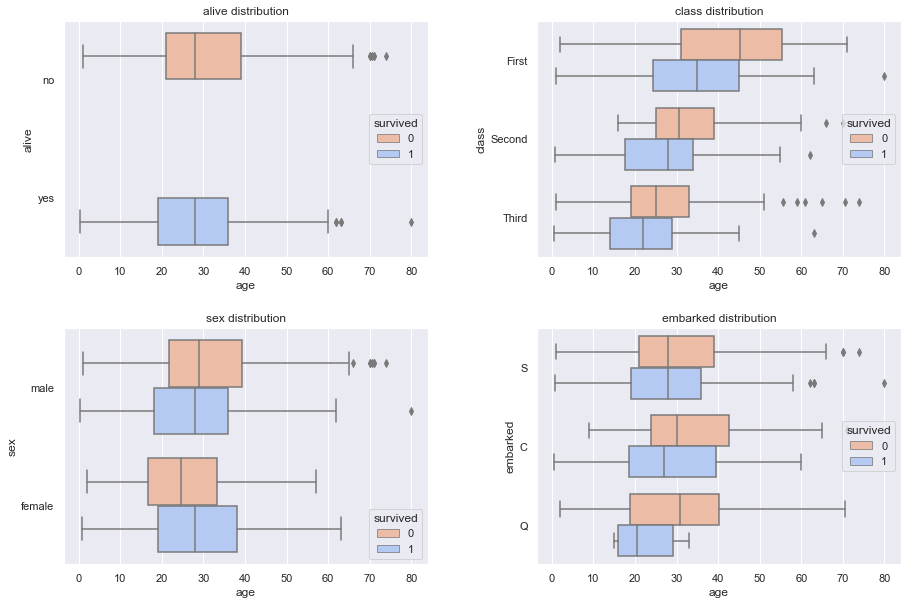

In [50]:
grid = gridspec.GridSpec(2,2)
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

t1_features = ["alive", "class", "sex", "embarked"]

# survived 와 alive, class, sex, emarked 변수 간 boxplot을 한번에 볼 수 있다.
for i, feature in enumerate(t1_features):
    ax = plt.subplot(grid[i])
    sns.boxplot(x="age", 
                y=feature, 
                 data=t1,
                 hue='survived',
                 palette='coolwarm_r',
                 ax=ax)
    ax.set_title(f'{feature} distribution')

- class가 높을수록 age가 높은 승객의 비율이 전반적으로 커지는 경향이 있다.
- 남자 승객 age 중앙값: 0(사망자) > 1(생존자)
- 여자 승객 age 중앙값: 1(생존자) > 0(사망자)
- 남자 승객 사망자는 전체적으로 나이가 많은 반면, 여자 승객 사망자는 나이가 어린 편이다.
- 모든 지역에서 사망자의 나이가 생존자에 비해 전반적으로 많은 편이다.
- Queenstown에서 승선한 사람의 생존자 boxplot 범위가 다른 boxplot에 비해 유의미하게 작다.